# Localised Regression charts

## Set-up

In [1]:
# external imports
from IPython.display import display

# local import
import plotting
from common import ATTITUDINAL, VOTING_INTENTION, ensure
from data_capture import retrieve

In [2]:
SHOW = True

In [3]:
## Plotting initialisation
def set_up_plotting() -> None:
    """Set up plotting."""

    p = plotting.get_chart_dir()
    plotting.set_chart_dir(p + '/loess-regression/')
    plotting.clear_chart_dir()


set_up_plotting()

## Get data

In [4]:
data = retrieve()
ensure(data, "You must run the data capture notebook every day.")

In [5]:
# Double check that our voting intention data has been normalized ...
# Ideally, this cell will show nothing is wrong.

checkable = "Primary", "2pp"
vi = data[VOTING_INTENTION]
for check in checkable:
    columns = [c for c in vi.columns if check in c and "Other" not in c]
    check_these = vi[columns]
    row_sum = check_these.sum(axis=1)
    fail = check_these[(row_sum > 100.01) | (row_sum < 99.99)].copy()
    if len(fail):
        fail["TOTAL"] = row_sum
        display(fail)

In [6]:
# Amalgamate the ONP, UAP and OTH columns
vi = plotting.amalgamate_other(data[VOTING_INTENTION])

# let's look at the Primary Vote column names ...
[x for x in vi.columns if "Primary vote" in x]

['Primary vote L/NP',
 'Primary vote ALP',
 'Primary vote GRN',
 'Primary vote ONP',
 'Primary vote TOP',
 'Primary vote OTH',
 'Primary vote UAP',
 'Primary vote Other']

## And plot

In [7]:
# Note: sometimes a change in case buggers up the
# plotable selection dictionary in the next code block.
# So let's make sure we have the correct names for each
# column

print(data[ATTITUDINAL].columns)

Index(['Date', 'Brand', 'Interview mode', 'Sample size',
       'Preferred prime minister Albanese', 'Preferred prime minister Dutton',
       'Preferred prime minister Don't Know', 'Preferred prime minister Net',
       'Albanese Satisfied', 'Albanese Dissatisfied', 'Albanese Don't Know',
       'Albanese Net', 'Dutton Satisfied', 'Dutton Dissatisfied',
       'Dutton Don't Know', 'Dutton Net', 'First Date', 'Mean Date',
       'Last Date'],
      dtype='object')


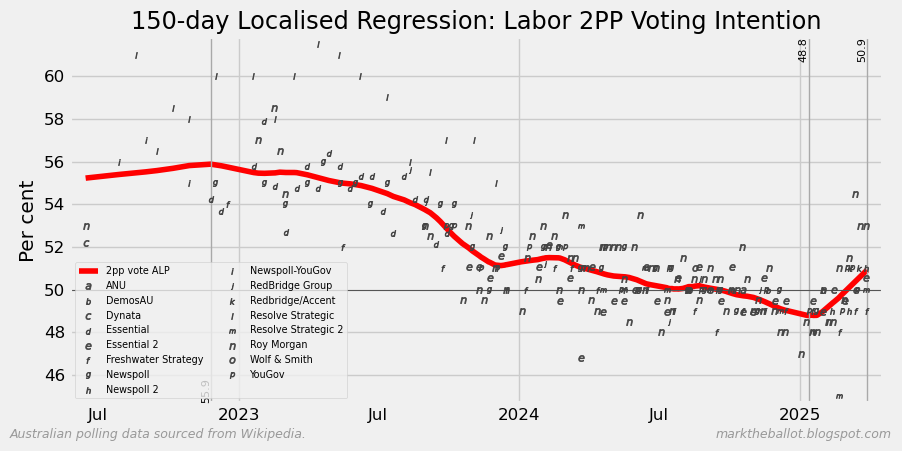

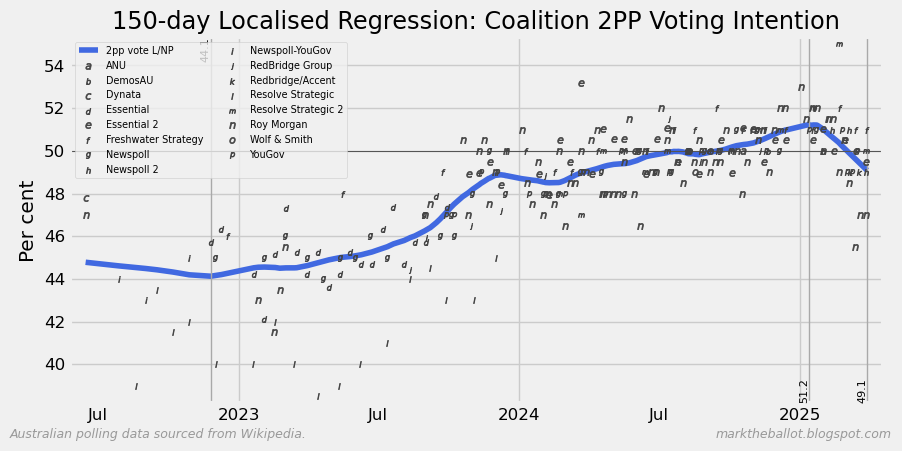

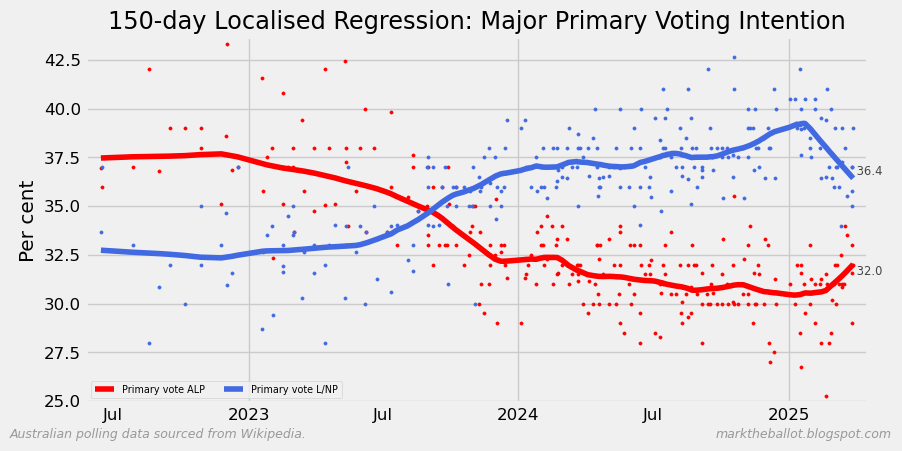

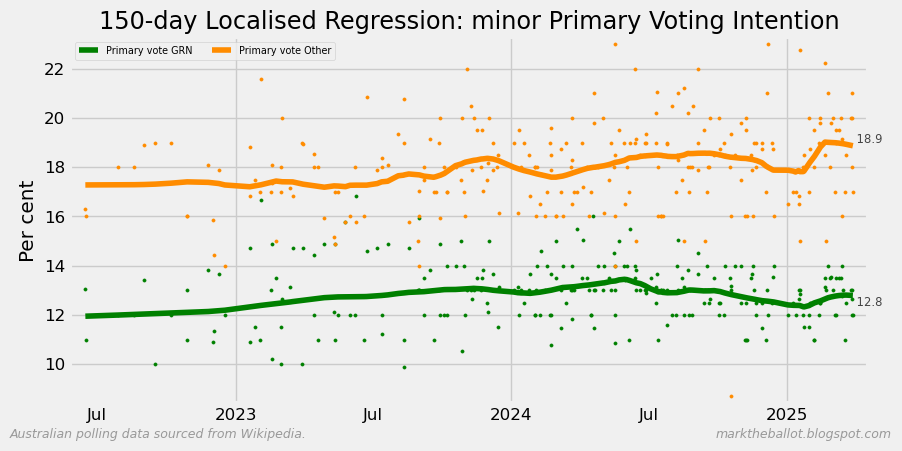

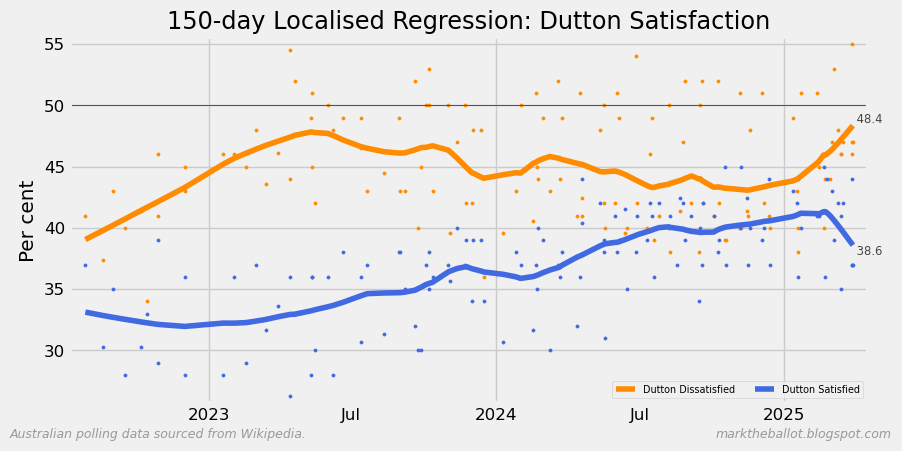

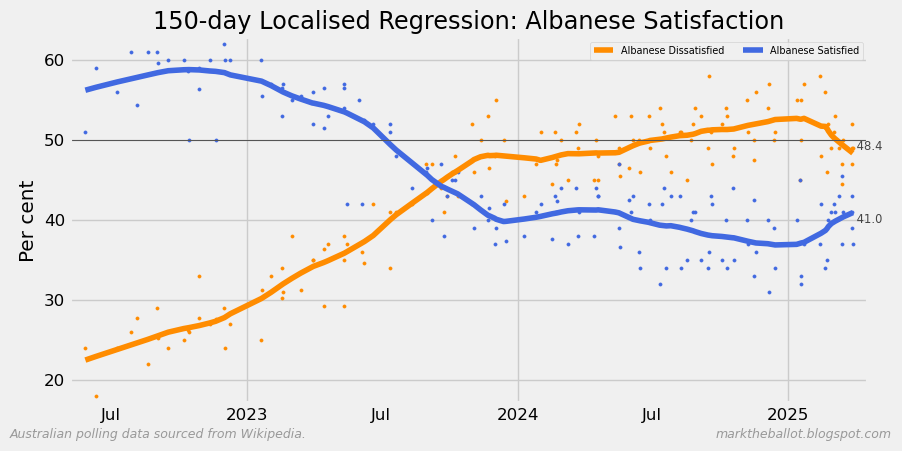

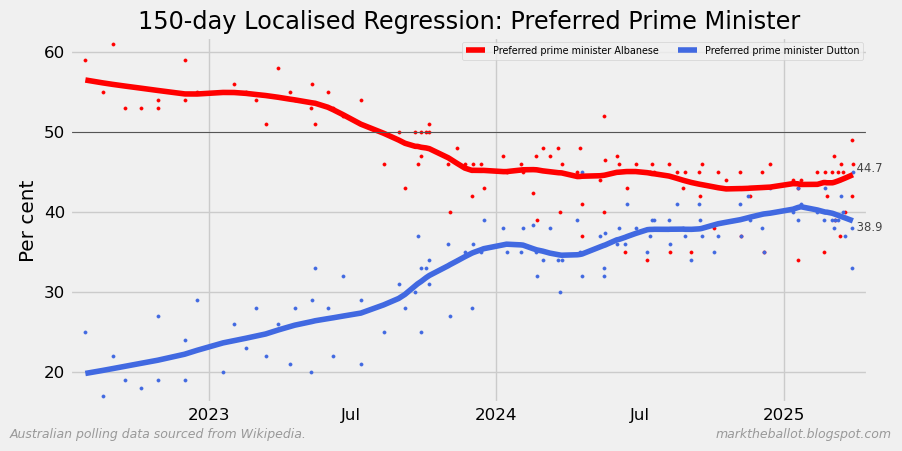

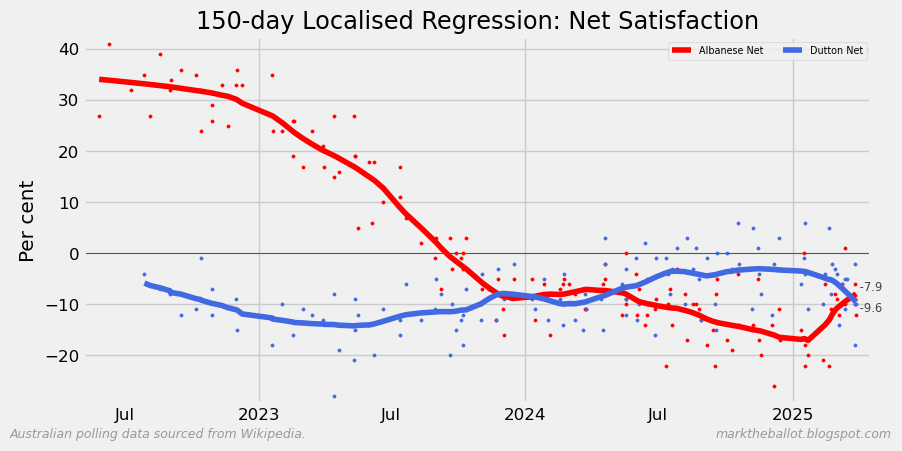

In [8]:
# what we will plot ...
plotable = {
    VOTING_INTENTION: {
        # regex patterns for matching desired columns
        r"2pp vote ALP": "Labor 2PP Voting Intention",
        r"2pp vote L/NP": "Coalition 2PP Voting Intention",
        r"Primary vote (L/NP|ALP)": "Major Primary Voting Intention",
        r"Primary vote (GRN|Other)": "minor Primary Voting Intention",
    },
    ATTITUDINAL: {
        # regex patterns for matching desired columns
        r"^Dutton (Satisfied|Dissatisfied)": "Dutton Satisfaction",
        r"^Albanese (Satisfied|Dissatisfied)": "Albanese Satisfaction",
        r"Preferred prime minister (Dutton|Albanese)": "Preferred Prime Minister",
        r"(Dutton|Albanese) Net": "Net Satisfaction",
    },
}

plotting.plot_loess(data, plotable, show=SHOW)

## Finished

In [9]:
%load_ext watermark
%watermark --python --machine --iversions --watermark

Python implementation: CPython
Python version       : 3.13.2
IPython version      : 9.0.2

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 24.3.0
Machine     : arm64
Processor   : arm
CPU cores   : 14
Architecture: 64bit

IPython: 9.0.2

Watermark: 2.5.0



In [10]:
print("Finished")

Finished
